In [1]:
import plotnine as pn
import polars as pl

In [71]:
era = pl.read_csv('.\data\era_league.csv')
pn.options.figure_size = (15, 6)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\cv0437li\AppData\Local\Temp\ipykernel_16324\1760882948.py:1: SyntaxWarning: invalid escape sequence '\d'


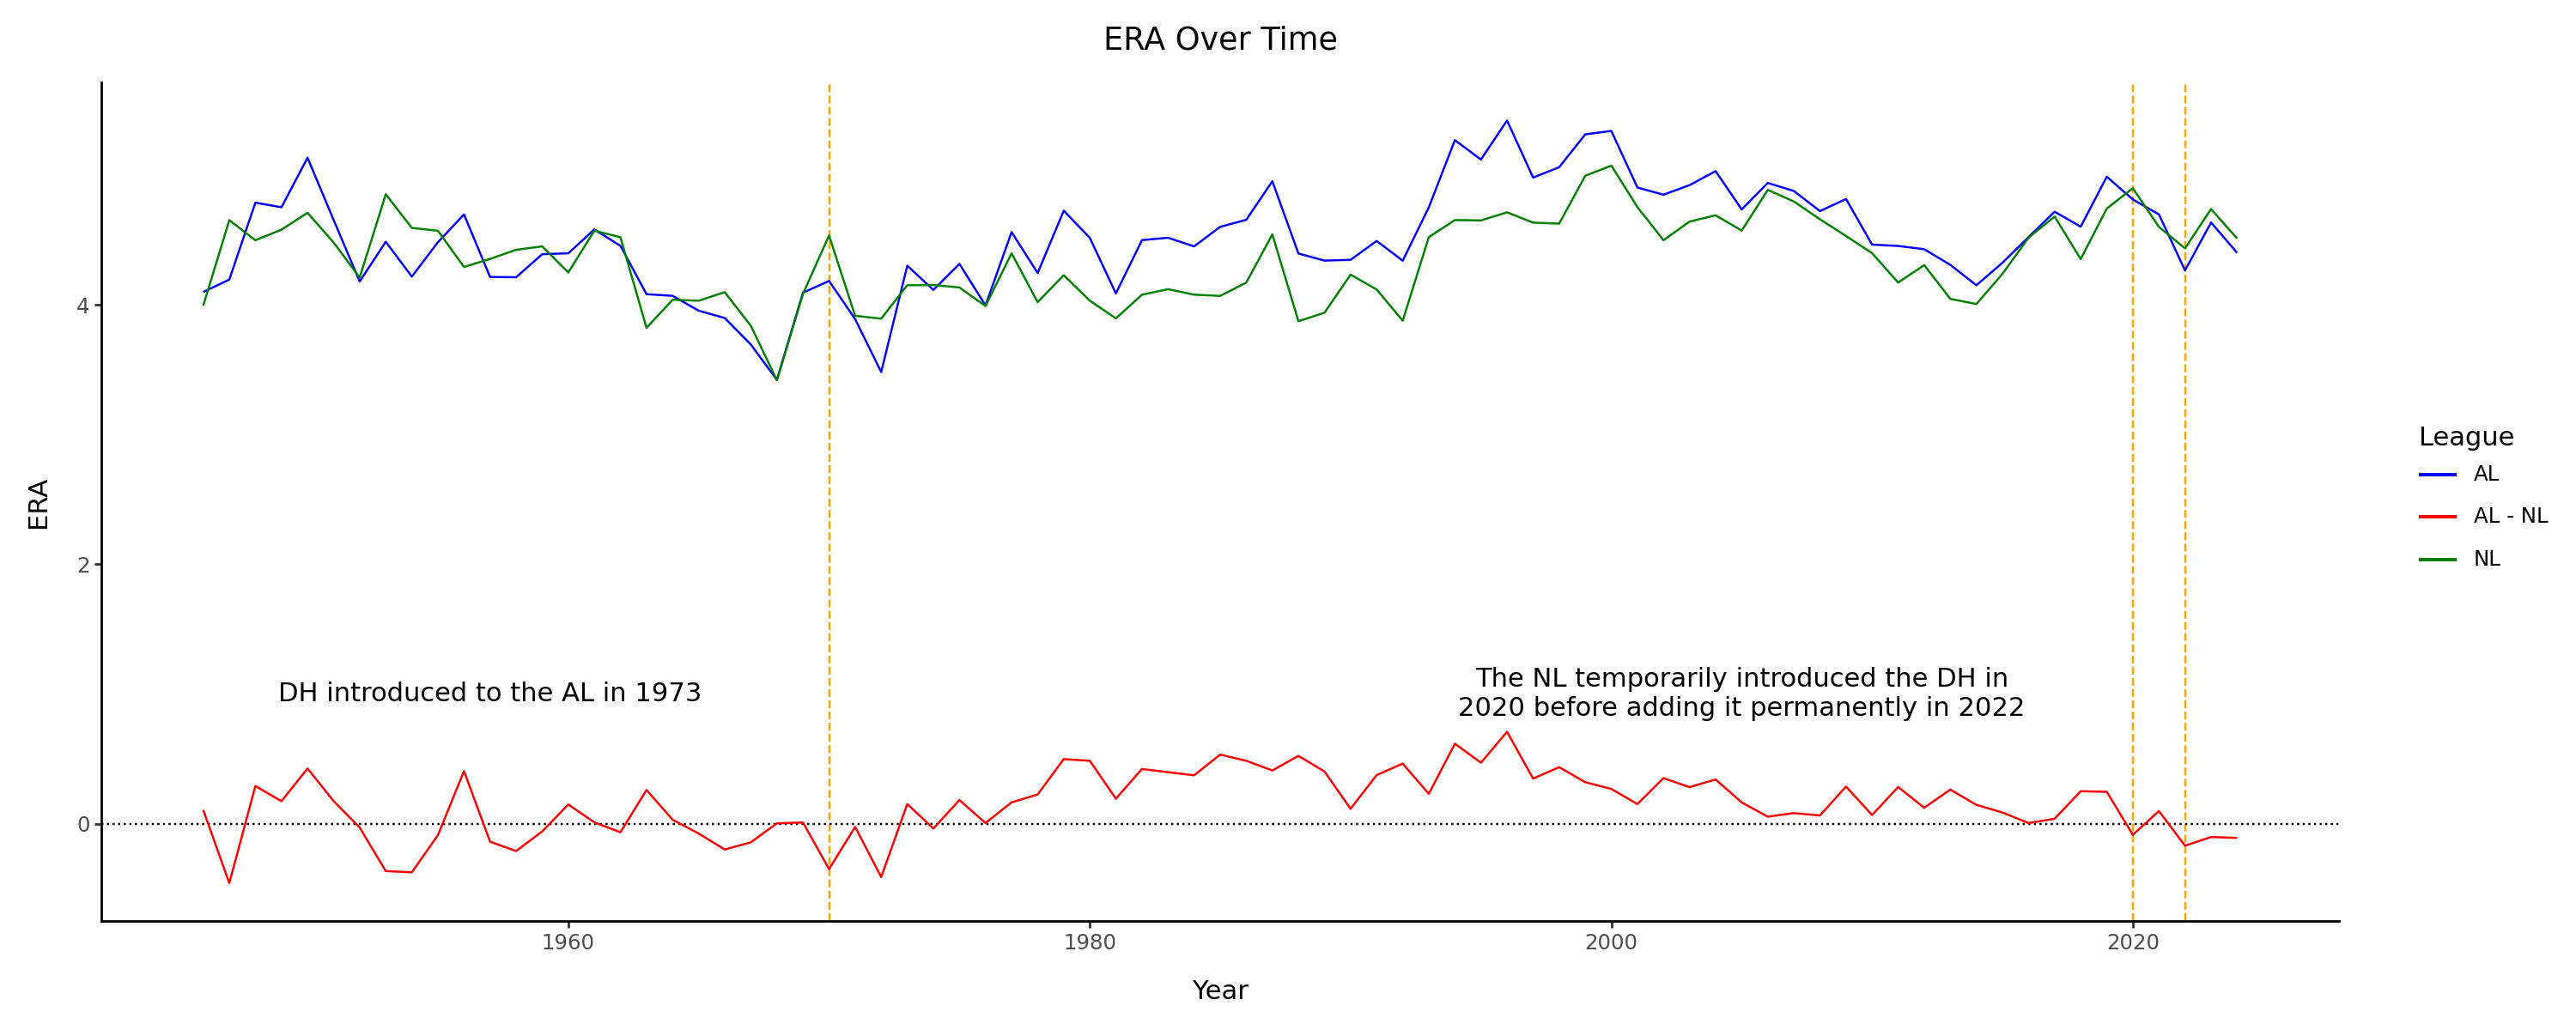

In [72]:
from plotnine import ggplot, aes, theme_classic, geom_vline, annotate, geom_hline, geom_line, scale_color_manual, xlab, ylab, ggsave, ggtitle

era_graph = (
    ggplot(data = 
            (
                era
                .pivot('lgID', index = "yearID", values = "era")
                .with_columns((pl.col('AL') - pl.col('NL')).alias("AL - NL"))
                .unpivot(index = 'yearID', variable_name="League", value_name= "era")
            )) 
    + aes(x = "yearID",
          y = "era",
          color = "League")
    + geom_vline(aes(xintercept = 1970), linetype = 'dashed', color = 'orange')
    + geom_vline(aes(xintercept = 2020), linetype = 'dashed', color = 'orange')
    + geom_vline(aes(xintercept = 2022), linetype = 'dashed', color = 'orange')
    + geom_hline(aes(yintercept = 0), linetype = 'dotted')
    + geom_line() 
    + annotate("text", x = 1957, y = 1, label = "DH introduced to the AL in 1973")
    + annotate("text", x = 2005, y = 1, label = "The NL temporarily introduced the DH in\n2020 before adding it permanently in 2022")
    + scale_color_manual(["blue", "red", "green"])
    + xlab('Year') + ylab('ERA')
    + ggtitle('ERA Over Time')
    + theme_classic()
)

era_graph

In [73]:
from plotnine import ggsave
ggsave(era_graph, "./img/era_graph.png")

c:\Users\cv0437li\AppData\Local\anaconda3\envs\polars\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 15 x 6 in image.
c:\Users\cv0437li\AppData\Local\anaconda3\envs\polars\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ./img/era_graph.png


## Slugging

In [62]:
slugging = pl.read_csv('./data/slugging.csv')
slugging.head()

yearID,lgID,single,double,triple,hr,at_bats,slugging,dh_rule
i64,str,i64,i64,i64,i64,i64,f64,str
1951,"""NL""",11088,1746,367,1024,42704,0.463118,"""No"""
1966,"""AL""",13005,2021,408,1365,54082,0.438797,"""No"""
1991,"""NL""",16363,2819,441,1430,65365,0.444336,"""No"""
1954,"""NL""",11142,1816,403,1114,42027,0.48633,"""No"""
2013,"""NL""",20768,4039,424,2157,82690,0.468569,"""No"""


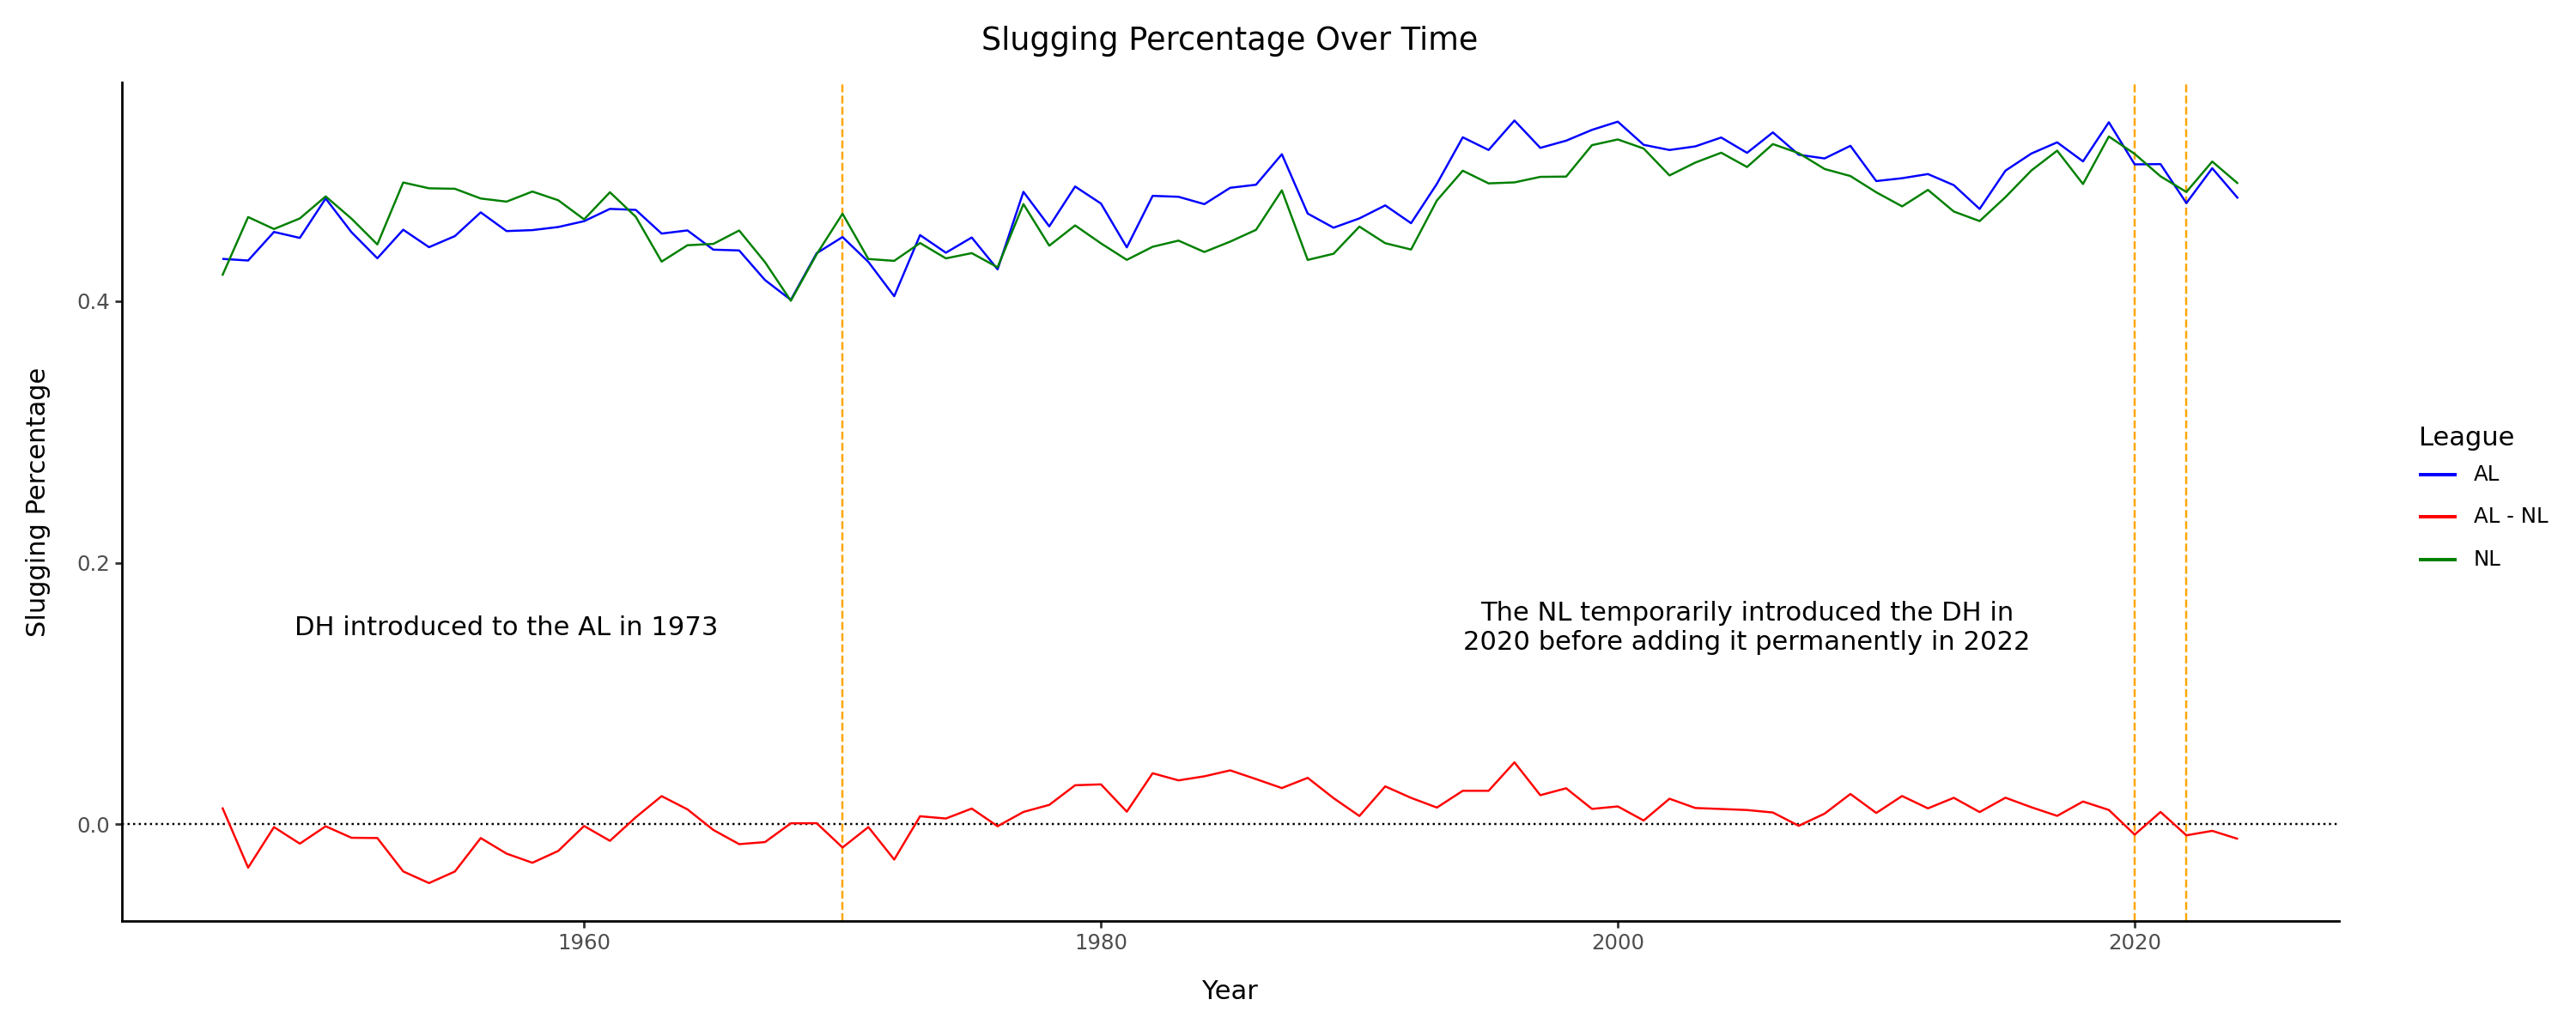

In [74]:
from plotnine import ggplot, aes, theme_classic, geom_vline, annotate, geom_hline, geom_line, scale_color_manual, xlab, ylab, ggsave

slugging_graph = (
    ggplot(data = 
            (
                slugging
                .pivot('lgID', index = "yearID", values = "slugging")
                .with_columns((pl.col('AL') - pl.col('NL')).alias("AL - NL"))
                .unpivot(index = 'yearID', variable_name="League", value_name= "slugging")
            )) 
    + aes(x = "yearID",
          y = "slugging",
          color = "League")
    + geom_vline(aes(xintercept = 1970), linetype = 'dashed', color = 'orange')
    + geom_vline(aes(xintercept = 2020), linetype = 'dashed', color = 'orange')
    + geom_vline(aes(xintercept = 2022), linetype = 'dashed', color = 'orange')
    + geom_hline(aes(yintercept = 0), linetype = 'dotted')
    + geom_line() 
    + annotate("text", x = 1957, y = 0.15, label = "DH introduced to the AL in 1973")
    + annotate("text", x = 2005, y = 0.15, label = "The NL temporarily introduced the DH in\n2020 before adding it permanently in 2022")
    + scale_color_manual(["blue", "red", "green"])
    + xlab('Year') + ylab('Slugging Percentage')
    + ggtitle('Slugging Percentage Over Time')
    + theme_classic()
)

slugging_graph

In [75]:
from plotnine import ggsave
ggsave(slugging_graph, "./img/slugging_graph.png")

c:\Users\cv0437li\AppData\Local\anaconda3\envs\polars\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 15 x 6 in image.
c:\Users\cv0437li\AppData\Local\anaconda3\envs\polars\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ./img/slugging_graph.png
